1. Estimate the channel capacity of plain old (wired) telephone service.

The Shannon capacity is $$ C = B\log_2(1+SNR) $$

The frequency spectrum of the human voice is from 300 to 3400 Hz and the typical SNR is 45dB according to https://www.jkaudio.com/article_03.htm 

In [3]:
import numpy as np

B = 3.1e3                       # Bandwidth in Hz   
SNR_dB = 45                     # signal to noise ratio in dB
SNR_linear = 10**(SNR_dB/10)    # linear conversion of SNR
C = B * np.log2(1 + SNR_linear) # Shannon capacity
print("The Shannon capacity is: ", C, "bits/s")

The Shannon capacity is:  46341.03834971382 bits/s


Using the point scatterer multipath propagation model from an earlier homework assignment,

(a) plot the SNR as a function of time for a moving receiver using spatial diversity with a simple selection algorithm, for isotropic radiator arrays of M = 1, 2, and 3 elements. 



(b) Plot the SNR CDFs with the analytical CDFs superimposed. 

(c) Plot the average SNR versus number of elements with the analytical result superimposed. 

(d) What happens if the array elements are very close together?

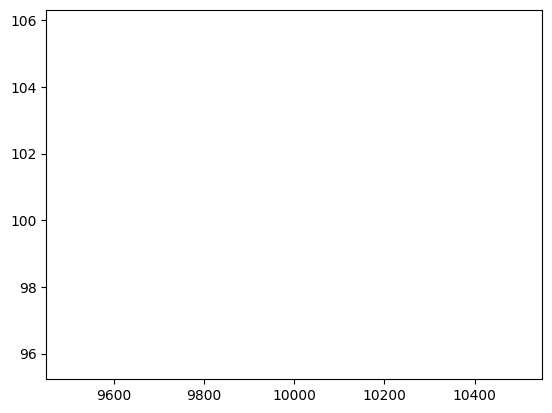

Selected SNR:  100.77444206533762


In [ ]:
# Scatterer multipath propagation model

import numpy as np
import matplotlib.pyplot as plt

# variables
points = 10000
bins = 200

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

# transmitter location
x_t = 0
y_t = 0

# locations for receiver
x_r = np.linspace(-10, 10, points)
y_r = np.zeros(points)

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)

# receiver model
M = [1, 2, 3]                       # number of elements
E = np.zeros(points, dtype=complex) # received field
x_r_e = [0, lam/2, lam]             # element positions within the array
ref_coef = -1                       # reflection coefficient
selected_snr = 0                    # maximum SNRs

# Noise power
k_B = 1.38e-23  # Boltzmann constant
T0 = 290        # Noise temperature
B = 1e6         # Bandwidth
N_0 = k_B*T0*B  # Noise power

# (a) plot the SNR as a function of time for a moving receiver 
# using spatial diversity with a simple selection algorithm, 
# for isotropic radiator arrays of M = 1, 2, and 3 elements.  

for m in range(0,points):
    for n in range(0,M[0]):
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-(x_r[m]+x_r_e[n]))**2+(y_s[m]-y_r[m])**2) 
        # received field
        E[m] = 1+ref_coef*np.exp(-1j*k*delta_r)
    
    # calculate the SNR
    S = np.abs(E)**2/(2*eta)            # power spectral density
    Prec = S*lam**2*Gr / (4*np.pi)      # Received power
    SNRs = Prec/ N_0                    # SNR

    selected_snr = np.max(SNRs, axis=0) # Max SNR
    print("Selected SNR: ", 10 * np.log10(selected_snr))
